In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
train_digits = pd.read_csv("data/mnist_train.csv")
test_digits = pd.read_csv("data/mnist_test.csv")
test_digits.shape

(9999, 785)

In [2]:
#convert pandas Data Frame to Numpy Array
train_array = train_digits.to_numpy()
test_array = test_digits.to_numpy()
# Datensatz hat 59999 Zeilen
train_array.shape


(59999, 785)

In [3]:
#show image 
def show_digit(sample):
    img = test_array[sample-1, 1:]
    img.shape = (28,28)
    plt.imshow(img, 'gray')

In [4]:
#compute average intensities of all rows describing the same number
#imshow as output
def avg_digit_img(dat, digit):

    #create list with rowindex for given digit
    list_digit = []
    for i in range(0, dat.shape[0]):
        if dat[i, 0] == digit:
            list_digit.append(i)

    #create np array filled with zeros in shape flat image
    avg = np.zeros((1,784))
    
    #sum up intensities from all selected images for every pixel
    for j in range(0, len(list_digit)):
        avg += dat[list_digit[j], 1:]
    #shape image
    avg.shape = (28,28)
    #divide by number of selected pictures for average intensity value
    avg /= len(list_digit)

    #show image and colorbar
    plt.imshow(avg, 'gray')
    plt.colorbar()


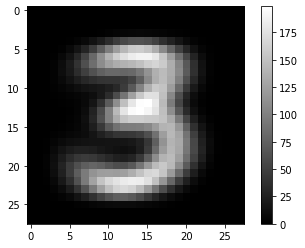

In [5]:
#use function avg_digit_img to look at average image of digit 2
avg_digit_img(train_array, 3)

In [6]:
#computes average intensities of all rows describing the same number
#returns numpy array
def avg_digit_arr(dat, digit):

    #create list with rowindex for given digit
    list_digit = []
    for i in range(0, dat.shape[0]):
        if dat[i, 0] == digit:
            list_digit.append(i)

    #create np array filled with zeros in shape flat image
    avg = np.zeros((1,784))

    #sum up intensities from all selected images for every pixel
    for j in range(0, len(list_digit)):
        avg += dat[list_digit[j], 1:]

    #divide by number of selected pictures for average intensity value
    avg /= len(list_digit)

    #return 1 dimensional array
    return avg

In [ ]:
#use function avg_digit_arr to look at array of average image of all ones
avg_digit_arr(train_array, 1)

In [7]:
#compare sample image with averaged images pixel by pixel
#select digit with lowest difference in intensity (output)
def digit_recognition(sample):

    intensities_list = [] #will be filled with average intensity differences for each digit 
    sample_img = test_array[sample-1, 1:] #create array with intensity values of sample

    #subtract avg array from sample array and store as difference array (diff_arr)
    for i in range(0,10):
        diff_arr = sample_img - avg_digit_arr(train_array, i)
        
        #turn difference array to difference list
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        #sum all absolute values of difference list and assign to variable intensity_sum
        intensity_sum = 0
        for k in range(0, len(diff_list)):
            diff_list[k] = diff_list[k]**2
            diff_list[k] = np.sqrt(diff_list[k])
            intensity_sum += diff_list[k]

        #append intensities_list by intensity sum
        #at the end of for loop, intensites_list contains 1 value for each of the 10 digits
        intensities_list.append(intensity_sum)

    #select smallest value and return as output
    return intensities_list.index(min(intensities_list))

In [9]:
def return_label(sample):
    return test_array[sample-1, 0]

In [10]:
#try out digit_recognition function
print(f'Prediction: {digit_recognition(10)}\n\
Real digit: {return_label(10)}')


Prediction: 0
Real digit: 0


In [ ]:
#Überprüfung:

true = 0
false = 0

for i in range(0, test_array.shape[0]):
    if digit_recognition(i+1) == test_array[i, 0]:
        true += 1
    else:
        false += 1


In [ ]:
#Überprüfung:
avg_list = []
for i in range(0,10):
    avg_list.append(avg_digit_arr(train_array, i))

def digit_recognition_fast(sample):
    #die geht schneller weil nicht immer die durchschnitsarrays neu berechnet werden
    intensities_list = [] 
    sample_img = test_array[sample-1, 1:] 

    for i in range(0,10):
        diff_arr = sample_img - avg_list[i]
        
        diff_list = []
        for j in range(0, 784):
            diff_list.append(diff_arr[0, j])

        intensity_sum = 0
        for k in range(0, len(diff_list)):
            diff_list[k] = diff_list[k]**2
            diff_list[k] = np.sqrt(diff_list[k])
            intensity_sum += diff_list[k]

        intensities_list.append(intensity_sum)

    return intensities_list.index(min(intensities_list))


true = 0
false = 0

#for i in range(0, test_array.shape[0]):
    if digit_recognition_fast(i+1) == test_array[i, 0]:
        true += 1
    else:
        false += 1

print(f'Anzahl richtig erkannter Digits: {true} \n\
Anzahl falsch erkannter Digits: {false} \n\
Richtig: {true/test_array.shape[0]*100} Prozent')
#66,85 Prozent

In [ ]:
zero = 0
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
seven = 0
eight = 0
nine = 0
for i in range (0, train_array.shape[0]):
    if train_array[i, 0]==0:
        zero += 1
    elif train_array[i, 0]==1:
        one += 1
    elif train_array[i, 0]==2:
        two += 1
    elif train_array[i, 0]==3:
        three += 1
    elif train_array[i, 0]==4:
        four += 1
    elif train_array[i, 0]==5:
        five += 1
    elif train_array[i, 0]==6:
        six += 1
    elif train_array[i, 0]==7:
        seven += 1
    elif train_array[i, 0]==8:
        eight += 1
    elif train_array[i, 0]==9:
        nine += 1
list_dig = [one, two, three, four, five, six, seven, eight, nine]


In [ ]:
print(zero, one, two, three, four, five, six, seven, eight, nine)
print(train_digits.shape)

In [ ]:

plt.hist(train_array[:,0], rwidth = 0.9)
plt.xlabel('digits')
plt.ylabel('counts')
plt.title('training dataset')


In [ ]:
#rausfinden, wo überall dreien sind
i = 0
dreien = []
while i <6:
    for j in range(0,100):
        if test_array[j, 0]== 3:
            dreien.append(j)
            i += 1

print(dreien)


In [11]:
def digit_rec_comp(sample):
    print(f'Prediction: {digit_recognition(sample)}\n\
Real digit: {return_label(sample)}')
    show_digit(sample)

Prediction: 0
Real digit: 0


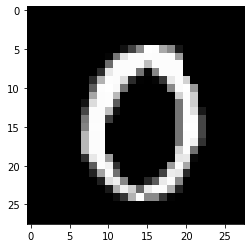

In [14]:
#try out digit_recognition function
digit_rec_comp(13)


In [15]:
#Z-Transformation
#Druchschnittsberechnung

mean_pixels = np.zeros((1, 784))
for i in range(0, train_array.shape[0]):
    mean_pixels += train_array[i, 1:train_array.shape[1]]
mean_pixels /= train_array.shape[0]

#Standardabweichung
std_pixels = np.zeros((1, 784))
for i in range(1, train_array.shape[1]):
    std_pixels[0, i-1] = np.std(train_array[:, i])

#print(std_pixels)

#Erstellen z-array
z_array = np.zeros(train_array.shape)

for i in range(0, train_array.shape[0]):
    z_array[i, 0] = train_array[i, 0]
    for j in range(1, train_array.shape[1]):
        if std_pixels[0, j-1] != 0:
            z_array[i, j] = (train_array[i, j] - mean_pixels[0, j-1])/std_pixels[0, j-1]

#print(z_array)


In [26]:
#mit col adden

clean_z_array = np.empty((59999, 717))
for i in range(0, z_array.shape[1]):
    if np.std(z_array[:, i]) != 0:
        np.c_[clean_z_array, z_array[:, i]]

In [28]:
#mit np.delete

for i in range(0, z_array.shape[1]):
    if np.std(z_array[:, i]) == 0:
        np.delete(z_array, i, 1)

In [31]:
with np.printoptions(threshold=np.inf):
    print(z_array)

In [24]:
empty_cols = 0
for i in range(0, z_array.shape[1]):
    if np.std(z_array[:, i]) == 0:
        empty_cols += 1

print(empty_cols)

67
